### Data Science Game 2017

Data fields

    media_id - identifiant of the song listened by the user
    album_id - identifiant of the album of the song
    media_duration - duration of the song
    user_gender -  gender of the user
    user_id -  anonymized id of the user
    context_type - type of content where the song was listened: playlist, album ...
    release_date - release date of the song with the format YYYYMMDD
    ts_listen - timestamp of the listening in UNIX time
    platform_name - type of os
    platform_family - type of device
    user_age - age of the user
    listen_type - if the songs was listened in a flow or not
    artist_id - identifiant of the artist of the song
    genre_id - identifiant of the genre of the song
    is_listened - 1 if the track was listened, 0 otherwise


In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv("../data/train_data3.csv")
df_test = pd.read_csv("../data/test_data3.csv")

In [3]:
df_train.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'genre_id', u'ts_listen', u'media_id',
       u'album_id', u'context_type', u'release_date', u'platform_name',
       u'platform_family', u'media_duration', u'listen_type', u'user_gender',
       u'user_id', u'artist_id', u'user_age', u'is_listened', u'text', u'year',
       u'diff_ts_listen_AND_release_date_D',
       u'diff_ts_listen_AND_release_date_M',
       u'diff_ts_listen_AND_release_date_Y', u'release_date_DAY',
       u'release_date_MONTH', u'release_date_YEAR', u'ts_listen_DAY_OF_WEEK',
       u'ts_listen_PERIOD_OF_DAY', u'user_age_group', u'diff_user_song_age',
       u'media_decade'],
      dtype='object')

In [4]:
to_drop = ['Unnamed: 0', 'Unnamed: 0.1']
df_train.drop(to_drop, axis = 1,inplace=True)
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,...,diff_ts_listen_AND_release_date_M,diff_ts_listen_AND_release_date_Y,release_date_DAY,release_date_MONTH,release_date_YEAR,ts_listen_DAY_OF_WEEK,ts_listen_PERIOD_OF_DAY,user_age_group,diff_user_song_age,media_decade
0,25471,2016-12-01 11:00:15,222606,41774,12,2004-07-04,1,0,4.0,0,...,151.100000,12.419178,4,7,2004,3,0,2.0,16.580822,7.0
1,25571,2016-11-30 20:25:35,250467,43941,0,2006-03-01,2,1,3.0,0,...,130.900000,10.758904,1,3,2006,2,2,2.0,19.241096,7.0
2,16,2016-11-19 11:59:13,305197,48078,1,2014-07-14,2,1,2.0,1,...,28.633333,2.353425,14,7,2014,5,0,2.0,26.646575,8.0
3,7,2016-11-26 07:21:38,900502,71521,0,2000-10-30,0,0,4.0,0,...,195.700000,16.084932,30,10,2000,5,0,2.0,13.915068,6.0
4,7,2016-11-05 16:02:54,542335,71718,0,2008-02-15,0,0,3.0,0,...,106.200000,8.728767,15,2,2008,5,1,1.0,15.271233,7.0


In [5]:
pd.isnull(df_train).sum()[pd.isnull(df_train).sum() > 0]

user_age_group    537853
media_decade        1554
dtype: int64

In [ ]:
df_train[df_train["release_date_YEAR"] == 1900][["media_id", "ts_listen"]]

In [15]:
df_train[df_train["release_date_YEAR"] == 1900][["media_id", "ts_listen"]]

,media_id,ts_listen
1924693,71089141,2016-11-13 00:49:01
1924694,71089141,2016-11-26 13:22:19
1924695,71089141,2016-11-05 06:37:20
1924696,71089141,2016-11-03 08:09:15
1924697,71089141,2016-11-01 17:12:53
1924698,71089141,2016-11-01 12:09:04
1947315,70834665,2016-11-05 19:12:28
1947316,70834665,2016-11-11 14:10:36
1947317,70834665,2016-11-06 18:41:02
1947318,70834665,2016-11-17 10:59:55


### Append User Specific

In [157]:
df_user = pd.read_csv("../data/nmidia_feats.csv", sep=";")
pd.isnull(df_user).sum()[pd.isnull(df_user).sum() > 0]
#df_user = df_user.drop(["nmidia_with_flow_listened_PROP", "nmidia_regular_listened_PROP", "nmidia_PROP_diff"], axis=1)
df_user.columns.values

array(['user_id', 'nmidia_regular_listened', 'nmidia_with_flow_listened',
       'nmidia_regular', 'nmidia_with_flow'], dtype=object)

In [158]:
pd.isnull(df_user).sum()[pd.isnull(df_user).sum() > 0]

Series([], dtype: int64)

In [159]:
df_train = pd.merge(df_train, df_user, on="user_id")
df_test = pd.merge(df_test, df_user, on="user_id")
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,...,release_date_YEAR,ts_listen_DAY_OF_WEEK,ts_listen_PERIOD_OF_DAY,user_age_group,diff_user_song_age,media_decade,nmidia_regular_listened,nmidia_with_flow_listened,nmidia_regular,nmidia_with_flow
0,25471,2016-12-01 11:00:15,222606,41774,12,2004-07-04,1,0,4.0,0,...,2004,3,0,2.0,16.580822,7.0,41,48,57,71
1,7,2016-12-01 10:48:50,4301418,400118,9,2009-10-16,1,0,7.0,0,...,2009,3,0,2.0,21.868493,7.0,41,48,57,71
2,10,2016-11-30 11:48:22,983248,109347,0,2002-10-21,1,0,3.0,0,...,2002,2,0,2.0,14.879452,7.0,41,48,57,71
3,10,2016-12-01 07:18:24,983248,109347,0,2002-10-21,1,0,3.0,0,...,2002,3,0,2.0,14.876712,7.0,41,48,57,71
4,10,2016-11-29 09:42:52,983248,109347,1,2002-10-21,1,0,3.0,1,...,2002,1,0,2.0,14.882192,7.0,41,48,57,71


### Check for NA
#### Ver depois sobre o user_age_group!

In [160]:
pd.isnull(df_train).sum()[pd.isnull(df_train).sum() > 0]

user_age_group    537853
media_decade        1554
dtype: int64

In [161]:
df_train.dropna(inplace=True)

In [162]:
y = df_train["is_listened"].values

In [163]:
categorical_cols = ["genre_id",
                   "media_id",
                   "album_id",
                   "context_type",
                   "release_date",
                   "platform_name",
                   "platform_family",
                   "listen_type",
                   "user_gender",
                   "user_id",
                   "artist_id",
                   "user_age"]

### Let's inspect the categorical variables!

In [164]:
for col in categorical_cols:
    print("{}: {}".format(col, len(df_train[col].unique())))

genre_id: 2898
media_id: 443308
album_id: 148260
context_type: 73
release_date: 8853
platform_name: 3
platform_family: 3
listen_type: 2
user_gender: 2
user_id: 17900
artist_id: 65683
user_age: 12


### Strategy
1. Apply onehot to categorical with few classes
2. Rank categories to artist id
3. target encoder for context and genre
4. discard media, album, release date and user_id

In [165]:
from greenpyce.feature_engineering import TargetEncoder
from greenpyce.feature_engineering import onehot
from greenpyce.feature_engineering import RankCategorical
from greenpyce.feature_engineering import LabelCount

In [166]:
df_train.columns.values

array(['genre_id', 'ts_listen', 'media_id', 'album_id', 'context_type',
       'release_date', 'platform_name', 'platform_family',
       'media_duration', 'listen_type', 'user_gender', 'user_id',
       'artist_id', 'user_age', 'is_listened', 'text', 'year',
       'diff_ts_listen_AND_release_date_D',
       'diff_ts_listen_AND_release_date_M',
       'diff_ts_listen_AND_release_date_Y', 'release_date_DAY',
       'release_date_MONTH', 'release_date_YEAR', 'ts_listen_DAY_OF_WEEK',
       'ts_listen_PERIOD_OF_DAY', 'user_age_group', 'diff_user_song_age',
       'media_decade', 'nmidia_regular_listened',
       'nmidia_with_flow_listened', 'nmidia_regular', 'nmidia_with_flow'], dtype=object)

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'genre_id', u'ts_listen', u'media_id',
       u'album_id', u'context_type', u'release_date', u'platform_name',
       u'platform_family', u'media_duration', u'listen_type', u'user_gender',
       u'user_id', u'artist_id', u'user_age', u'is_listened', u'text', u'year',
       u'diff_ts_listen_AND_release_date_D',
       u'diff_ts_listen_AND_release_date_M',
       u'diff_ts_listen_AND_release_date_Y', u'release_date_DAY',
       u'release_date_MONTH', u'release_date_YEAR', u'ts_listen_DAY_OF_WEEK',
       u'ts_listen_PERIOD_OF_DAY', u'user_age_group', u'diff_user_song_age',
       u'media_decade'],
      dtype='object')

In [167]:
cols_for_target_encoder = ["genre_id", 
                           "context_type", 
                           "user_id", 
                           "media_id", 
                           "listen_type"]

cols_for_onehot = ["platform_name", 
                   "platform_family", 
                   "listen_type", 
                   "user_gender", 
                   "user_age_group", 
                   "ts_listen_DAY_OF_WEEK",
                  "ts_listen_PERIOD_OF_DAY"]

cols_for_rank = ["artist_id"]
                #"media_decade"]


target = "is_listened"

In [168]:
te = TargetEncoder(cols_for_target_encoder, "is_listened")

In [169]:
te.fit(df_train)

In [170]:
te.transform(df_train)
te.transform(df_test)

In [171]:
rc = RankCategorical(cols_for_rank)
rc.fit(df_train)
rc.transform(df_train)
rc.transform(df_test)

In [172]:
rc = RankCategorical(["media_decade"])
rc.fit(df_train)
rc.transform(df_train)
rc.transform(df_test)

In [173]:
# lc = RankCategorical(cols_for_count)
# lc.fit(df_train)
# lc.transform(df_train)
# lc.transform(df_test)

In [174]:
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,...,release_date_YEAR,ts_listen_DAY_OF_WEEK,ts_listen_PERIOD_OF_DAY,user_age_group,diff_user_song_age,media_decade,nmidia_regular_listened,nmidia_with_flow_listened,nmidia_regular,nmidia_with_flow
0,0.691194,2016-12-01 11:00:15,0.000000,41774,0.699260,2004-07-04,1,0,4.0,0.724121,...,2004,3,0,2.0,16.580822,2,41,48,57,71
1,0.666537,2016-12-01 10:48:50,0.739007,400118,0.758484,2009-10-16,1,0,7.0,0.724121,...,2009,3,0,2.0,21.868493,2,41,48,57,71
2,0.727470,2016-11-30 11:48:22,0.640273,109347,0.689701,2002-10-21,1,0,3.0,0.724121,...,2002,2,0,2.0,14.879452,2,41,48,57,71
3,0.727470,2016-12-01 07:18:24,0.640273,109347,0.689701,2002-10-21,1,0,3.0,0.724121,...,2002,3,0,2.0,14.876712,2,41,48,57,71
4,0.727470,2016-11-29 09:42:52,0.640273,109347,0.580230,2002-10-21,1,0,3.0,0.606895,...,2002,1,0,2.0,14.882192,2,41,48,57,71


In [175]:
df_train = onehot(df_train, cols_for_onehot)
df_test = onehot(df_test, cols_for_onehot)

In [176]:
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,media_duration,user_id,artist_id,user_age,...,user_age_group_2.0,ts_listen_DAY_OF_WEEK_1,ts_listen_DAY_OF_WEEK_2,ts_listen_DAY_OF_WEEK_3,ts_listen_DAY_OF_WEEK_4,ts_listen_DAY_OF_WEEK_5,ts_listen_DAY_OF_WEEK_6,ts_listen_PERIOD_OF_DAY_1,ts_listen_PERIOD_OF_DAY_2,ts_listen_PERIOD_OF_DAY_3
0,0.691194,2016-12-01 11:00:15,0.000000,41774,0.699260,2004-07-04,4.0,0.676991,58696,29,...,1,0,0,1,0,0,0,0,0,0
1,0.666537,2016-12-01 10:48:50,0.739007,400118,0.758484,2009-10-16,7.0,0.676991,593,29,...,1,0,0,1,0,0,0,0,0,0
2,0.727470,2016-11-30 11:48:22,0.640273,109347,0.689701,2002-10-21,3.0,0.676991,62,29,...,1,0,1,0,0,0,0,0,0,0
3,0.727470,2016-12-01 07:18:24,0.640273,109347,0.689701,2002-10-21,3.0,0.676991,62,29,...,1,0,0,1,0,0,0,0,0,0
4,0.727470,2016-11-29 09:42:52,0.640273,109347,0.580230,2002-10-21,3.0,0.676991,62,29,...,1,1,0,0,0,0,0,0,0,0


In [177]:
#df_train = rank_categorical(df_train, cols_for_rank)

In [178]:
df_train.columns.values

array(['genre_id', 'ts_listen', 'media_id', 'album_id', 'context_type',
       'release_date', 'media_duration', 'user_id', 'artist_id',
       'user_age', 'is_listened', 'text', 'year',
       'diff_ts_listen_AND_release_date_D',
       'diff_ts_listen_AND_release_date_M',
       'diff_ts_listen_AND_release_date_Y', 'release_date_DAY',
       'release_date_MONTH', 'release_date_YEAR', 'diff_user_song_age',
       'media_decade', 'nmidia_regular_listened',
       'nmidia_with_flow_listened', 'nmidia_regular', 'nmidia_with_flow',
       'platform_name_1', 'platform_name_2', 'platform_family_1',
       'platform_family_2', 'listen_type_0.724121441309', 'user_gender_1',
       'user_age_group_1.0', 'user_age_group_2.0',
       'ts_listen_DAY_OF_WEEK_1', 'ts_listen_DAY_OF_WEEK_2',
       'ts_listen_DAY_OF_WEEK_3', 'ts_listen_DAY_OF_WEEK_4',
       'ts_listen_DAY_OF_WEEK_5', 'ts_listen_DAY_OF_WEEK_6',
       'ts_listen_PERIOD_OF_DAY_1', 'ts_listen_PERIOD_OF_DAY_2',
       'ts_listen_PERIOD_

In [179]:
### Drop
to_drop = ['ts_listen', 'album_id', 'release_date', 'artist_id', "year", "text"]
df_train.drop(to_drop, axis = 1,inplace=True)
df_test.drop(to_drop, axis = 1,inplace=True)

In [180]:
# to_drop = ["year", "text"]
# df_train.drop(to_drop, axis = 1,inplace=True)

In [181]:
features = [col for col in df_train.columns.values if col != target]
features

['genre_id',
 'media_id',
 'context_type',
 'media_duration',
 'user_id',
 'user_age',
 'diff_ts_listen_AND_release_date_D',
 'diff_ts_listen_AND_release_date_M',
 'diff_ts_listen_AND_release_date_Y',
 'release_date_DAY',
 'release_date_MONTH',
 'release_date_YEAR',
 'diff_user_song_age',
 'media_decade',
 'nmidia_regular_listened',
 'nmidia_with_flow_listened',
 'nmidia_regular',
 'nmidia_with_flow',
 'platform_name_1',
 'platform_name_2',
 'platform_family_1',
 'platform_family_2',
 'listen_type_0.724121441309',
 'user_gender_1',
 'user_age_group_1.0',
 'user_age_group_2.0',
 'ts_listen_DAY_OF_WEEK_1',
 'ts_listen_DAY_OF_WEEK_2',
 'ts_listen_DAY_OF_WEEK_3',
 'ts_listen_DAY_OF_WEEK_4',
 'ts_listen_DAY_OF_WEEK_5',
 'ts_listen_DAY_OF_WEEK_6',
 'ts_listen_PERIOD_OF_DAY_1',
 'ts_listen_PERIOD_OF_DAY_2',
 'ts_listen_PERIOD_OF_DAY_3']

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.2)

### Feature Selection

In [184]:
from sklearn import feature_selection
all_features = features
function_rule_selection = feature_selection.f_classif
alpha_cutoff = 0.01

selection_rule = feature_selection.SelectFdr(function_rule_selection, alpha_cutoff)
selection_rule.fit(X_train, y_train);

all_pvalues = list(filter(lambda x: pd.notnull(x[0]), zip(selection_rule.pvalues_, all_features)))
#print(all_pvalues)
filtered_pvalues = list(filter(lambda x: x[0]<=alpha_cutoff, all_pvalues))
#print(filtered_pvalues)
all_select_features = list(map(lambda x: x[1], filtered_pvalues))

print("{0} selected variables from {1}, {2:.2f}%".format(len(all_select_features), 
                                                        len(all_features), 
                                                        len(filtered_pvalues)*100/float(len(all_features))))
print(all_select_features)
#print(filtered_pvalues)

33 selected variables from 35, 94.29%
['genre_id', 'media_id', 'context_type', 'media_duration', 'user_id', 'user_age', 'diff_ts_listen_AND_release_date_D', 'diff_ts_listen_AND_release_date_M', 'diff_ts_listen_AND_release_date_Y', 'release_date_MONTH', 'release_date_YEAR', 'diff_user_song_age', 'media_decade', 'nmidia_regular_listened', 'nmidia_with_flow_listened', 'nmidia_regular', 'nmidia_with_flow', 'platform_name_1', 'platform_name_2', 'platform_family_1', 'platform_family_2', 'listen_type_0.724121441309', 'user_gender_1', 'user_age_group_1.0', 'user_age_group_2.0', 'ts_listen_DAY_OF_WEEK_1', 'ts_listen_DAY_OF_WEEK_3', 'ts_listen_DAY_OF_WEEK_4', 'ts_listen_DAY_OF_WEEK_5', 'ts_listen_DAY_OF_WEEK_6', 'ts_listen_PERIOD_OF_DAY_1', 'ts_listen_PERIOD_OF_DAY_2', 'ts_listen_PERIOD_OF_DAY_3']


In [185]:
feaures = all_select_features
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.2)

In [186]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def complete_report(y_test, y_pred):
    print("*********************************")
    print("Accuracy: {0:.2f}".format(accuracy_score(y_test, y_pred)))
    print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
    print("Recall: {0}".format(metrics.recall_score(y_test, y_pred)))
    print("F1-Score: {0}".format(metrics.f1_score(y_test, y_pred)))
    conf_m = confusion_matrix(y_test, y_pred)
    print(conf_m)
    try: 
        print("Roc Area: {0}".format(metrics.roc_auc_score(y_test, y_pred))) 
        roc_curve_label(y_test, y_pred)
    except:
        print("--")
    print("*********************************")
    
    return metrics.roc_auc_score(y_test, y_pred)
        
def roc_curve_label(y_test, y_pred):
    plt.figsize=(10,6)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='RT + LR')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

In [187]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

0.73988293963
*********************************
Accuracy: 0.74
Precision: 0.815328656849
Recall: 0.803374764533
F1-Score: 0.809307571802
[[263803 175517]
 [189659 774912]]
Roc Area: 0.701927526125


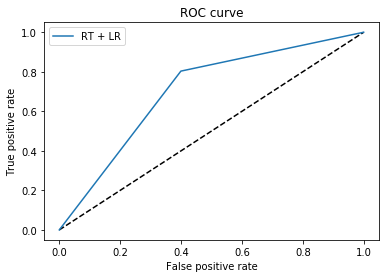

*********************************


0.70192752612500386

In [188]:
print(model.score(X_test, y_test))
complete_report(y_test, model.predict(X_test))

acc: 0.70345496362865445  
roc: 0.6912675674785278

In [189]:
from sklearn.metrics import confusion_matrix

In [190]:
confusion_matrix(y_test, model.predict(X_test))

array([[263803, 175517],
       [189659, 774912]])

In [191]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.78365485639554633

*********************************
Accuracy: 0.78
Precision: 0.84001691734
Recall: 0.846298509908
F1-Score: 0.843146014032
[[283851 155469]
 [148256 816315]]
Roc Area: 0.746206479756


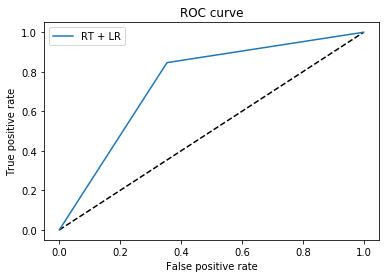

*********************************


0.7462064797557233

In [192]:
complete_report(y_test, model.predict(X_test))

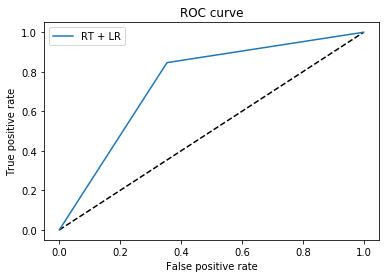

In [193]:
roc_curve_label(y_test, model.predict(X_test))

In [194]:
import gzip
import csv
import numpy as np

def build_kaggle_submission(preds, filename="my_submission"):
    """
    Build a compressed Kaggle Submission
    
    preds: array with predictions
    """
    with gzip.open(filename + '.csv.gz', 'wt') as outf:
        fo = csv.writer(outf, lineterminator='\n')
        fo.writerow(["sample_id", "is_listened"])       
        for i, pred in enumerate(preds):
            fo.writerow([i, pred])

In [195]:
p = model.predict_proba(df_test[features])

In [196]:
p = p[:, 1]

In [197]:
build_kaggle_submission(p, "random_forest_user_feats")

In [198]:
import sys
print(sys.getsizeof(df_train) / 1e6)
print(sys.getsizeof(df_test) / 1e6)
print(sys.getsizeof(model) / 1e6)

1242.442859
3.684862
6.4e-05


### GridSearch and XGBoost

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Reshape
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint
import numpy as np

In [ ]:
model = Sequential()
model.add(Embedding(df_train["album_id"].max(), 64, input_length=10))
model.add(Dense(1, activation="relu"))
# the model will take as input an integer matrix of size (batch, input_length).
# the largest integer (i.e. word index) in the input should be no larger than 999 (vocabulary size).
# now model.output_shape == (None, 10, 64), where None is the batch dimension.

input_array = np.random.randint(1000, size=(32, 10))
print(input_array)
model.compile('rmsprop', 'mse')
model.fit(input_array, np.array([1]))

output_array = model.predict(input_array)
#assert output_array.shape == (32, 10, 64)
print(output_array)

In [ ]:
df_train["album_id"].max()

In [ ]:
output_array